In [1]:
%matplotlib inline
from matplotlib import pyplot as plt
import matplotlib

import pandas as pd
import numpy as np
import seaborn as sns
import itertools

import sys
sys.path.append('../data/tecantaloupe/')

from growth.plate_spec import PlateSpec
from growth.plate_time_course_parser import SavageLabM1000Excel
from matplotlib import pyplot as plt

import seaborn as sns
from utils import *

matplotlib.rcParams.update({'font.size': 30})

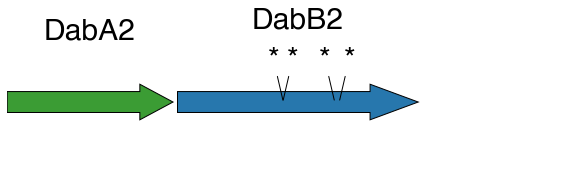

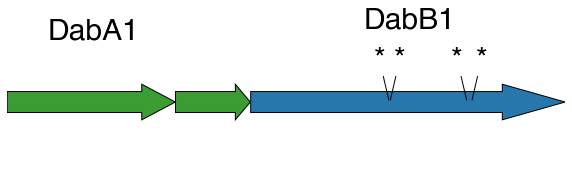

In [21]:
fig,ax = plt.subplots(figsize=(10,1.5), frameon=False)


colors = qual_palette
aCol=colors[3]
bCol=colors[1]

width=0.05
head_width=0.085
head_scale=0.2


#     Make DAB2
y=0.25
oplength=4185
opstart=7103
len_per_bp = 1e-4

#     make DAB2A (NDH)
geneStart=7103
geneLen=1656
x=geneStart-opstart
genLength= geneLen * len_per_bp
dab2A = matplotlib.patches.FancyArrow(x,y,genLength,0,width=width,length_includes_head=True,
                                      head_width=head_width, fill=True,facecolor=aCol,
                                     head_length=genLength*head_scale)
ax.add_artist(dab2A)
plt.text(x+genLength/2,y+2*head_width,'DabA2', size=30, ha='center', va='center',color="k", rotation=0)

#     Make DAB2B (DUF)
geneStart=5402
geneLen=2404
x=(opstart-geneStart) * len_per_bp
genLength= geneLen * len_per_bp
dab2B = matplotlib.patches.FancyArrow(x,y,genLength,0,width=width,length_includes_head=True,
                                      head_width=head_width, fill=True,facecolor=bCol,
                                     head_length=genLength*head_scale)
ax.add_artist(dab2B)
plt.text(x+genLength/2,y+2.3*head_width,'DabB2', size=30, ha='center', va='center',color="k", rotation=0)

#     plot active site residues
loc=3832
x=(opstart-loc) * len_per_bp
plt.annotate('*',[x,y],xytext=[x-0.01,y+head_width],arrowprops={'arrowstyle':'-'},ha='center')

loc=3787
x=(opstart-loc) * len_per_bp
plt.annotate('*',[x,y],xytext=[x+0.01,y+head_width],arrowprops={'arrowstyle':'-'},ha='center')

loc=4351
x=(opstart-loc) * len_per_bp
plt.annotate('*',[x,y],xytext=[x+0.01,y+head_width],arrowprops={'arrowstyle':'-'},ha='center')

loc=4345
x=(opstart-loc) * len_per_bp
plt.annotate('*',[x,y],xytext=[x-0.01,y+head_width],arrowprops={'arrowstyle':'-'},ha='center')

ax.xaxis.set_visible(False)
ax.yaxis.set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
plt.ylim(0.1,0.3)
plt.xlim(0,5573* len_per_bp)

plt.savefig('fig3/fig3A_sub1.eps', format='eps', bbox_inches='tight')

plt.show()


fig,ax = plt.subplots(figsize=(10,1.5), frameon=False)

#     Make DAB1
y=0.25
oplength=5573
opstart=8433

#     make DAB1A (NDH)
geneStart=8433
geneLen=1680
x=geneStart-opstart
genLength= geneLen * len_per_bp
dab2A = matplotlib.patches.FancyArrow(x,y,genLength,0,width=width,length_includes_head=True,
                                      head_width=head_width, fill=True,facecolor=aCol,
                                     head_length=genLength*head_scale)
ax.add_artist(dab2A)
plt.text(x+genLength/2,y+2*head_width,'DabA1', size=30, ha='center', va='center',color="k", rotation=0)

#     Make DAB1B (DUF)
geneStart=6752
geneLen=747
x=(opstart-geneStart) * len_per_bp
genLength= geneLen * len_per_bp
dab2B = matplotlib.patches.FancyArrow(x,y,genLength,0,width=width,length_includes_head=True,
                                      head_width=head_width, fill=True,facecolor=aCol,
                                     head_length=genLength*head_scale)
ax.add_artist(dab2B)
#     plt.text(x+genLength/2,y+2*head_width,'DAB1A2', size=18, ha='center', va='center',color="k", rotation=0)

#     Make DAB1C (DUF)
geneStart=6001
geneLen=3141
x=(opstart-geneStart) * len_per_bp
genLength= geneLen * len_per_bp
dab2B = matplotlib.patches.FancyArrow(x,y,genLength,0,width=width,length_includes_head=True,
                                      head_width=head_width, fill=True,facecolor=bCol,
                                     head_length=genLength*head_scale)
ax.add_artist(dab2B)
plt.text(x+genLength/2,y+2.3*head_width,'DabB1', size=30, ha='center', va='center',color="k", rotation=0)

#     plot active site residues
loc=4611
x=(opstart-loc) * len_per_bp
plt.annotate('*',[x,y],xytext=[x+0.01,y+head_width],arrowprops={'arrowstyle':'-'},ha='center')

loc=4617
x=(opstart-loc) * len_per_bp
plt.annotate('*',[x,y],xytext=[x-0.01,y+head_width],arrowprops={'arrowstyle':'-'},ha='center')

loc=3795
x=(opstart-loc) * len_per_bp
plt.annotate('*',[x,y],xytext=[x+0.01,y+head_width],arrowprops={'arrowstyle':'-'},ha='center')

loc=3840
x=(opstart-loc) * len_per_bp
plt.annotate('*',[x,y],xytext=[x-0.01,y+head_width],arrowprops={'arrowstyle':'-'},ha='center')

ax.xaxis.set_visible(False)
ax.yaxis.set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
plt.ylim(0.1,0.3)
plt.xlim(0,5573* len_per_bp)

plt.savefig('fig3/fig3A_sub2.eps', format='eps', bbox_inches='tight')

plt.show()

In [3]:
def prepAndNormalize(ps,timecourse,cutoffTime):
    blanked = timecourse.blank()
    smoothed = blanked.smooth()
    data = smoothed.data_for_label('abs600')
    print('length of run: ' + str(max(data.time_s)/60/60))
    data=data[data.time_s<=cutoffTime*60*60]
    print('length after cut: ' + str(max(data.time_s)/60/60))
    yld = smoothed.GrowthYield(density_label='abs600')
    name2well = ps.name_to_well_mapping()

    yld = pd.DataFrame(yld, index=['yield']).T
    grouped_yld = yld.groupby(ps.well_to_name_mapping())
    mean_yield = grouped_yld.mean()
    
    normalized_yld = yld / mean_yield.loc['bw+pFE-sfGFP']
    normalized_mean_yld = normalized_yld.groupby(ps.well_to_name_mapping()).mean()
    normalized_std_yld = normalized_yld.groupby(ps.well_to_name_mapping()).std()
    return( (normalized_mean_yld,normalized_std_yld) )

../data/tecantaloupe/growth/plate_time_course_parser.py:80: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  return clipped_df.convert_objects(convert_numeric=True)
/Library/Frameworks/Python.framework/Versions/3.4/lib/python3.4/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


length of run: 30.9041111111
length after cut: 23.8113888889


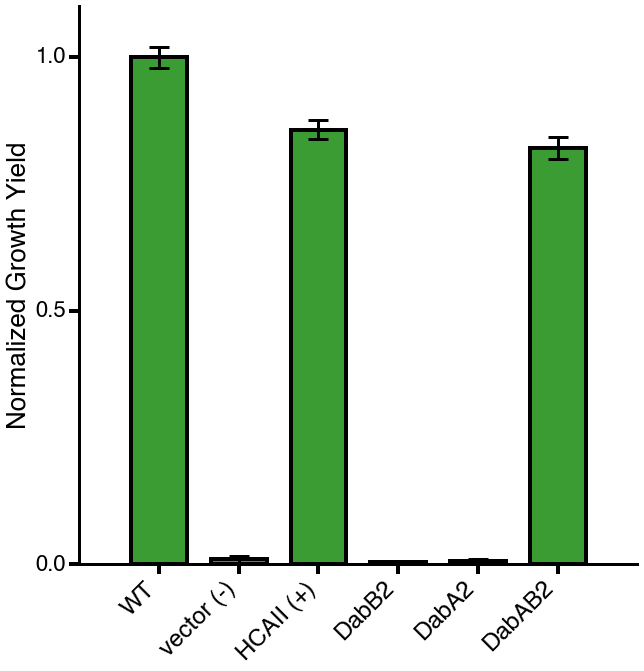

In [11]:
fig,ax = plt.subplots(figsize=(10,10))

pCol=colors[3]
nCol=colors[3]
eCol=colors[3]

# PlateSpec defined in CSV for easy editing
ps = PlateSpec.FromFile('../data/tecantaloupe/growth/plate_specs/2018_02_07_operon1CAFreeKnockInGrowth_metalKO_nice.csv')

parser = SavageLabM1000Excel()
timecourse = parser.ParseFromFilename('../data/tecantaloupe/growth/data/2018_02_09_CAFree_operon1_rescue_experiment_metal_KO_later.xlsx')
normalized_mean_yld,normalized_std_yld=prepAndNormalize(ps,timecourse,24)

#     print(data)
to_plot = [
    ('bw+pFE-sfGFP', 'WT'),
    ('CAF+pFE-sfGFP', 'vector (-)'),
    ('CAF+pFE-HCA2', 'HCAII (+)'),
    ('CAF+pFE-NDH', 'DabB2'),
    ('CAF+pFE-DUF', 'DabA2'),
    ('CAF+pFE-DAB2_wt', 'DabAB2'),
]


labels = [name for label, name in to_plot]
ylds = [normalized_mean_yld.loc[t[0]][0] for t in to_plot]
stds = [normalized_std_yld.loc[t[0]][0] for t in to_plot]

xs = np.arange(len(ylds))
plt.bar(xs, ylds, yerr=stds, color=pCol, align='center', ecolor='k', width=0.7, edgecolor='k',
        linewidth=4, capsize=10, error_kw={'capsize': 10, 'capthick': 3, 'elinewidth': 3})

plt.ylabel('Normalized Growth Yield', fontsize=26)

plt.xticks(xs, labels, rotation=45, fontsize=24, ha='right')
plt.tick_params(axis='both', direction='out', bottom='on', left='on', top='off', right='off',
                length=10, width=4)
plt.yticks([0, 0.5, 1.0], fontsize=22)
plt.ylim(0.0, 1.1)
    # Hide the right and top spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

# Only show ticks on the left and bottom spines
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')

#     change axis weight
ax.spines['left'].set_linewidth(3)
ax.spines['bottom'].set_linewidth(3)
    
plt.savefig('fig3/fig3B.eps',format='eps',bbox_inches='tight')
plt.show()

               CPMA             
res            DMSO         CCCP
cells                           
CAN     1401.644444   387.750000
GFP      -89.038889  -232.650000
SbtA    3308.800000  1016.766667
DAB2   11270.600000  1034.000000


/Library/Frameworks/Python.framework/Versions/3.4/lib/python3.4/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


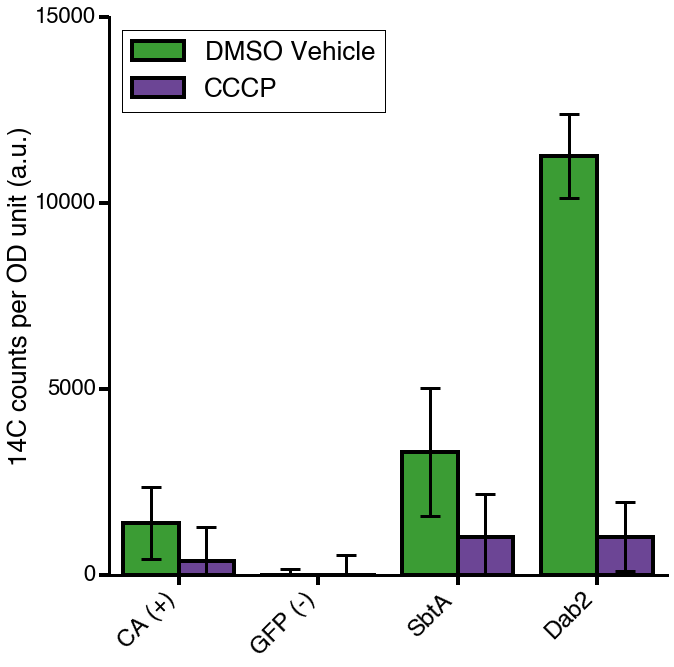

In [5]:
fig,ax = plt.subplots(figsize=(10,10))


pCol=colors[3] #dmso
nCol=colors[9] #CCCP
ncols = [pCol,nCol,eCol]

counts = pd.read_excel("../data/bicarbUptake/2018_11_01_BicarbUptake_gradientCouple_pFA.xlsx")
for col in ['number','CPMA','CPMB','SIS','tSIE']:
    counts.loc[:,col]=counts.loc[:,col].astype('float')
counts=counts[counts.cells!='Curve']

togroup = counts.drop(['vial','SIS','tSIE','number','Time','CPMB'],axis=1)
togroup[togroup.select_dtypes(include=['number']).columns]=togroup[togroup.select_dtypes(include=['number']).columns]/(0.8*0.6*(0.2/0.8272))


grouped = togroup.groupby(['cells','res'])

displayOrder=['CAN','GFP','SbtA','DAB2']

colOrder=[('CPMA','DMSO'),('CPMA','CCCP')]
labels=['DMSO Vehicle','CCCP']
ticks=['CA (+)','GFP (-)','SbtA','Dab2']

means = grouped.mean()
#     print(means)
means.loc[:,'CPMA'] = means.loc[:,'CPMA']-means.loc[('Blank'),'CPMA']
unstackedMeans = means.unstack().loc[displayOrder][colOrder]
print(unstackedMeans)

stds = grouped.std()
stds.loc[:,'CPMA'] = (stds.loc[:,'CPMA']**2+stds.loc[('Blank'),'CPMA']**2)**0.5
unstackedStds = stds.unstack().loc[displayOrder][colOrder]


width = 0.4
offsets=[-width/2,width/2]
for i,col in enumerate(colOrder):
#         figuring out number of ODs of cells per assay to normalize... we have 0.8 ml at 0.6 OD, we add 0.0272 ml of volume
#         then we take 0.2 ml per experiment. so thats 0.8*0.6*(0.2/0.8272)
    data = unstackedMeans[col]
    stds = unstackedStds[col]
    xs = np.arange(len(data))+offsets[i]

    plt.bar(xs, data, yerr=stds, color=ncols[i], align='center', ecolor='k', width=width, edgecolor='k',label=labels[i],
            linewidth=4, capsize=10, error_kw={'capsize': 10, 'capthick': 3, 'elinewidth': 3})

    plt.ylabel('Normalized Growth Yield', fontsize=26)
xs = np.arange(len(data))
plt.xticks(xs, ticks, rotation=45, fontsize=24, ha='right')
plt.tick_params(axis='both', direction='out', bottom='on', left='on', top='off', right='off',
                    length=10, width=4)
plt.yticks([0, 5000, 10000,15000], fontsize=22)
plt.ylim(0.0, 15000)

plt.legend(fontsize=26,loc=2)
#     plt.title('Blanked bicarbonate uptake')
plt.ylabel('14C counts per OD unit (a.u.)')

# Hide the right and top spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

# Only show ticks on the left and bottom spines
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')

#     change axis weight
ax.spines['left'].set_linewidth(3)
ax.spines['bottom'].set_linewidth(3)


#     print(unstackedStds)
#     print(unstackedMeans)
    
    
plt.savefig('fig3/fig3C.eps',format='eps',bbox_inches='tight')

plt.show()